# Feature Engineering

## Objective
Create essential features for recommendation models


1. **User Features**: Core behavior metrics (ratings, activity, preferences)
2. **Item Features**: Essential product characteristics and popularity
3. **Interaction Matrix**: Memory-safe collaborative filtering matrix
4. **Temporal Validation**: Prevent data leakage with time splits

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings

from scipy.sparse import issparse
from datetime import datetime

# Import utils
sys.path.append('../utils')
from db_loader import load_amazon_data_k_core
from preprocessing import clean_reviews_data, clean_products_data
from feature_engineering import load_and_create_features, create_feature_summary

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 6)

  Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.16.2-cp313-cp313-win_amd64.whl (38.5 MB)



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. Data Loading & Temporal Setup

Load data and set up temporal validation to prevent data leakage.

In [18]:
features = load_and_create_features()

Loading data...
Loading Amazon data with 5-core filtering...
Applying 5-core filtering...
Original dataset: 4,000,000 reviews
Applying 5-core filtering...
Original dataset: 4,000,000 reviews
Original users: 708,183
Original users: 708,183
Original items: 85,124
Original items: 85,124
Iteration 1: 2,943,852 reviews, 346,998 users, 63,126 items
Iteration 1: 2,943,852 reviews, 346,998 users, 63,126 items
Iteration 2: 2,894,141 reviews, 339,516 users, 57,095 items
Iteration 2: 2,894,141 reviews, 339,516 users, 57,095 items
Iteration 3: 2,876,440 reviews, 335,444 users, 56,691 items
Iteration 3: 2,876,440 reviews, 335,444 users, 56,691 items
Iteration 4: 2,874,287 reviews, 335,121 users, 56,472 items
Iteration 4: 2,874,287 reviews, 335,121 users, 56,472 items
Iteration 5: 2,873,490 reviews, 334,940 users, 56,453 items
Iteration 5: 2,873,490 reviews, 334,940 users, 56,453 items
Iteration 6: 2,873,422 reviews, 334,931 users, 56,445 items
Iteration 6: 2,873,422 reviews, 334,931 users, 56,445 i

## 2. Explore Feature Creation



In [ ]:

# Extract individual feature components
user_features = features['user_features']
item_features = features['item_features'] 
interaction_features = features['interaction_features']
interaction_matrix = features['interaction_matrix']

    

In [34]:
# Explore the features created
print("FEATURE EXPLORATION")
print("="*50)

# Overview
print("\nFeature Set Overview:")
for name, data in features.items():
    if hasattr(data, 'shape'):
        print(f"  {name}: {data.shape}")
    else:
        print(f"  {name}: {type(data).__name__}")

# User Features
print(f"\nUser Features: {user_features.shape}")
print(f"Columns: {list(user_features.columns)}")
print(f"Sample stats:")
print(f"  Avg reviews per user: {user_features['user_review_count'].mean():.1f}")
print(f"  Avg user rating: {user_features['user_avg_rating'].mean():.2f}")

# Item Features  
print(f"\nItem Features: {item_features.shape}")
print(f"Columns: {list(item_features.columns)}")
print(f"Sample stats:")
print(f"  Avg reviews per item: {item_features['item_review_count'].mean():.1f}")
print(f"  Avg item rating: {item_features['item_avg_rating'].mean():.2f}")

# Interaction Features
print(f"\nInteraction Features: {interaction_features.shape}")
print(f"Unique users: {interaction_features['reviewerid'].nunique():,}")
print(f"Unique items: {interaction_features['asin'].nunique():,}")

# Sparse Matrix

if issparse(interaction_matrix):
    density = interaction_matrix.nnz / (interaction_matrix.shape[0] * interaction_matrix.shape[1])
    print(f"\nSparse Matrix: {interaction_matrix.shape[0]:,} x {interaction_matrix.shape[1]:,}")
    print(f"Non-zero entries: {interaction_matrix.nnz:,}")
    print(f"Sparsity: {(1-density)*100:.2f}%")

print("\nFeature exploration completed!")

FEATURE EXPLORATION

Feature Set Overview:
  user_features: (669848, 5)
  item_features: (112890, 7)
  interaction_features: (2721300, 6)
  interaction_matrix: (4999, 3000)

User Features: (669848, 5)
Columns: ['user_review_count', 'user_avg_rating', 'user_rating_std', 'user_verified_ratio', 'overall']
Sample stats:
  Avg reviews per user: 8.1
  Avg user rating: 4.28

Item Features: (112890, 7)
Columns: ['item_review_count', 'item_avg_rating', 'item_rating_std', 'item_unique_reviewers', 'item_verified_ratio', 'overall', 'item_category_size']
Sample stats:
  Avg reviews per item: 48.2
  Avg item rating: 4.19

Interaction Features: (2721300, 6)
Unique users: 334,924
Unique users: 334,924
Unique items: 56,445

Feature exploration completed!
Unique items: 56,445

Feature exploration completed!


## 3. Feature Analysis

Quick analysis of the essential features created.

In [35]:
interaction_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2721300 entries, 9 to 3999999
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   reviewerid        object 
 1   asin              object 
 2   overall           float64
 3   user_avg_rating   float64
 4   item_avg_rating   float64
 5   rating_deviation  float64
dtypes: float64(4), object(2)
memory usage: 145.3+ MB


FEATURE ANALYSIS

User Features: (669848, 5)
Item Features: (112890, 7)
Interactions: (2721300, 6)

Key Statistics:
  Avg reviews per user: 8.1
  Avg user rating: 4.28
  Avg reviews per item: 48.2
  Avg item rating: 4.19


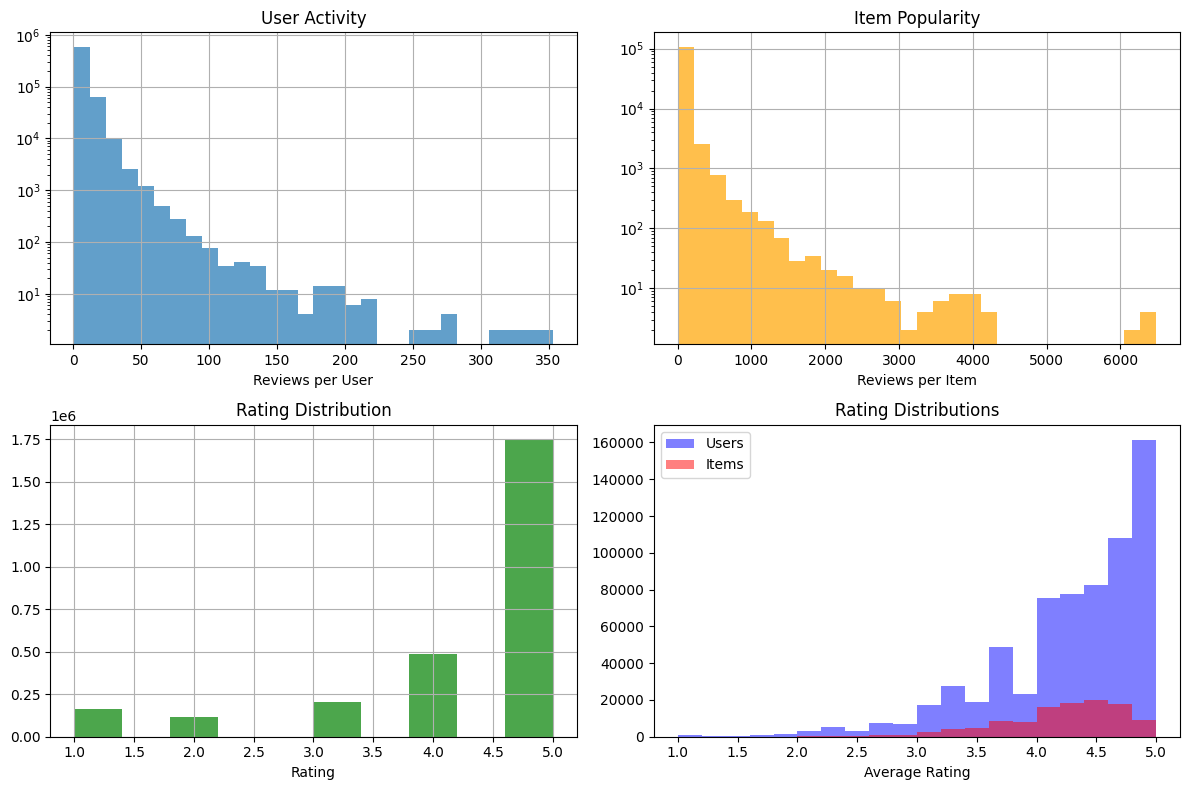

In [36]:
# Feature analysis and visualization
print("FEATURE ANALYSIS")
print("="*50)

# Quick stats
print(f"\nUser Features: {user_features.shape}")
print(f"Item Features: {item_features.shape}")
print(f"Interactions: {interaction_features.shape}")

print(f"\nKey Statistics:")
print(f"  Avg reviews per user: {user_features['user_review_count'].mean():.1f}")
print(f"  Avg user rating: {user_features['user_avg_rating'].mean():.2f}")
print(f"  Avg reviews per item: {item_features['item_review_count'].mean():.1f}")
print(f"  Avg item rating: {item_features['item_avg_rating'].mean():.2f}")

# Simple visualizations
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# User activity
user_features['user_review_count'].hist(bins=30, ax=axes[0,0], alpha=0.7)
axes[0,0].set_title('User Activity')
axes[0,0].set_xlabel('Reviews per User')
axes[0,0].set_yscale('log')

# Item popularity
item_features['item_review_count'].hist(bins=30, ax=axes[0,1], alpha=0.7, color='orange')
axes[0,1].set_title('Item Popularity')
axes[0,1].set_xlabel('Reviews per Item')
axes[0,1].set_yscale('log')

# Rating distribution
interaction_features['overall'].hist(bins=10, ax=axes[1,0], alpha=0.7, color='green')
axes[1,0].set_title('Rating Distribution')
axes[1,0].set_xlabel('Rating')

# User vs Item rating distributions (side by side)
axes[1,1].hist(user_features['user_avg_rating'], bins=20, alpha=0.5, label='Users', color='blue')
axes[1,1].hist(item_features['item_avg_rating'], bins=20, alpha=0.5, label='Items', color='red')
axes[1,1].set_title('Rating Distributions')
axes[1,1].set_xlabel('Average Rating')
axes[1,1].legend()

plt.tight_layout()
plt.show()

In [37]:
# Interaction matrix analysis
print("INTERACTION MATRIX")
print("="*30)

if issparse(interaction_matrix):
    total_possible = interaction_matrix.shape[0] * interaction_matrix.shape[1]
    sparsity = (1 - interaction_matrix.nnz / total_possible) * 100
    memory_mb = (interaction_matrix.data.nbytes + interaction_matrix.indices.nbytes + interaction_matrix.indptr.nbytes) / 1024**2
    
    print(f"Shape: {interaction_matrix.shape[0]:,} x {interaction_matrix.shape[1]:,}")
    print(f"Non-zero entries: {interaction_matrix.nnz:,}")
    print(f"Sparsity: {sparsity:.2f}%")
    print(f"Memory usage: {memory_mb:.1f} MB")
    print(f"Rating range: [{interaction_matrix.data.min():.1f}, {interaction_matrix.data.max():.1f}]")
else:
    print(f"Shape: {interaction_matrix.shape}")

print("\nMatrix ready for collaborative filtering!")

INTERACTION MATRIX
Shape: (4999, 3000)

Matrix ready for collaborative filtering!


## 4.Saving results

In [38]:
# Save features for modeling
import pickle
import os
from scipy.sparse import save_npz

# Create directory and save features
features_dir = '../data/features'
os.makedirs(features_dir, exist_ok=True)

print("Saving features...")

# Save dataframes
user_features.to_parquet(f'{features_dir}/user_features.parquet')
item_features.to_parquet(f'{features_dir}/item_features.parquet')
interaction_features.to_parquet(f'{features_dir}/interaction_features.parquet')

# Save sparse matrix
if hasattr(interaction_matrix, 'nnz'):
    save_npz(f'{features_dir}/interaction_matrix.npz', interaction_matrix)
else:
    with open(f'{features_dir}/interaction_matrix.pkl', 'wb') as f:
        pickle.dump(interaction_matrix, f)

# Save metadata
metadata = {
    'creation_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'user_count': len(user_features),
    'item_count': len(item_features),
    'interaction_count': len(interaction_features),
    'matrix_shape': interaction_matrix.shape
}

with open(f'{features_dir}/metadata.pickle', 'wb') as f:
    pickle.dump(metadata, f)

# loop through saved files and print their names
print("Saved files:")
for filename in os.listdir(features_dir):
    print(f" - {filename}")



print(f"Features saved to: {features_dir}/")
print("Ready for modeling!")

Saving features...
Saved files:
 - interaction_features.parquet
 - interaction_matrix.pkl
 - item_features.parquet
 - metadata.pickle
 - user_features.parquet
Features saved to: ../data/features/
Ready for modeling!
